In [1]:
import cbpro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline 
public_client = cbpro.PublicClient()

In [2]:
test = public_client.get_product_historic_rates('ETH-USD', granularity=3600,start ='07/19/2021', end='07/25/2021')
df = pd.DataFrame(test)
df.rename(columns={0: 'time', 1: 'low ', 2: 'high', 3: 'open', 4: 'close', 5: 'volume'}, inplace=True)
df

,time,low,high,open,close,volume
0,1627171200,2142.67,2196.70,2186.76,2154.89,13368.305651
1,1627167600,2160.64,2189.97,2171.02,2185.95,5920.886534
2,1627164000,2154.58,2174.00,2169.24,2171.46,4269.408937
3,1627160400,2138.76,2175.00,2154.69,2169.22,5862.714617
4,1627156800,2128.61,2158.62,2146.28,2154.15,7604.796177
...,...,...,...,...,...,...
140,1626667200,1882.02,1899.17,1886.09,1898.70,3102.657870
141,1626663600,1877.00,1894.24,1878.73,1886.10,4872.677129
142,1626660000,1873.11,1888.82,1882.46,1878.73,4601.992857
143,1626656400,1866.34,1886.96,1885.46,1882.46,8766.044953


In [2]:
test = public_client.get_product_historic_rates('ETH-USD', granularity=86400,start ='09/02/2021', end='11/25/2021')
df = pd.DataFrame(test)
df.rename(columns={0: 'time', 1: 'low ', 2: 'high', 3: 'open', 4: 'close', 5: 'volume'}, inplace=True)
df

,time,low,high,open,close,volume
0,1637798400,4250.00,4555.11,4270.93,4525.87,132338.281735
1,1637712000,4168.99,4359.88,4341.58,4270.74,120268.677290
2,1637625600,4062.28,4389.95,4089.17,4341.62,159935.237979
3,1637539200,4024.45,4322.86,4263.04,4089.16,174572.989325
4,1637452800,4246.07,4427.72,4416.36,4262.99,83775.316761
...,...,...,...,...,...,...
80,1630886400,3868.00,3973.27,3951.68,3928.89,111675.629917
81,1630800000,3835.70,3982.64,3887.58,3952.17,101339.561578
82,1630713600,3834.57,3970.00,3940.06,3887.53,130047.415695
83,1630627200,3710.59,4030.35,3788.20,3940.06,284766.160387


In [3]:
from datetime import datetime
def convertdate(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [4]:
df['Date'] = df['time'].apply(convertdate)

In [5]:
df

,time,low,high,open,close,volume,Date
0,1637798400,4250.00,4555.11,4270.93,4525.87,132338.281735,2021-11-25 00:00:00
1,1637712000,4168.99,4359.88,4341.58,4270.74,120268.677290,2021-11-24 00:00:00
2,1637625600,4062.28,4389.95,4089.17,4341.62,159935.237979,2021-11-23 00:00:00
3,1637539200,4024.45,4322.86,4263.04,4089.16,174572.989325,2021-11-22 00:00:00
4,1637452800,4246.07,4427.72,4416.36,4262.99,83775.316761,2021-11-21 00:00:00
...,...,...,...,...,...,...,...
80,1630886400,3868.00,3973.27,3951.68,3928.89,111675.629917,2021-09-06 00:00:00
81,1630800000,3835.70,3982.64,3887.58,3952.17,101339.561578,2021-09-05 00:00:00
82,1630713600,3834.57,3970.00,3940.06,3887.53,130047.415695,2021-09-04 00:00:00
83,1630627200,3710.59,4030.35,3788.20,3940.06,284766.160387,2021-09-03 00:00:00


In [6]:
len(df)

85

In [7]:
df.to_csv('ethereum_market_data_month_latest.csv')

In [9]:
df['close'].describe()

count     145.000000
mean     1955.981310
std       134.795872
min      1728.730000
25%      1820.430000
50%      1978.490000
75%      2060.250000
max      2194.980000
Name: close, dtype: float64

In [10]:
df['Return'] = df['close'].pct_change()

In [11]:
df.head()

,time,low,high,open,close,volume,Date,Return
0,1627171200,2142.67,2196.70,2186.76,2154.89,13368.305651,2021-07-25 00:00:00,NaN
1,1627167600,2160.64,2189.97,2171.02,2185.95,5920.886534,2021-07-24 23:00:00,0.014414
2,1627164000,2154.58,2174.00,2169.24,2171.46,4269.408937,2021-07-24 22:00:00,-0.006629
3,1627160400,2138.76,2175.00,2154.69,2169.22,5862.714617,2021-07-24 21:00:00,-0.001032
4,1627156800,2128.61,2158.62,2146.28,2154.15,7604.796177,2021-07-24 20:00:00,-0.006947


In [12]:
np.mean(df['Return'])

-0.0008897048911155282

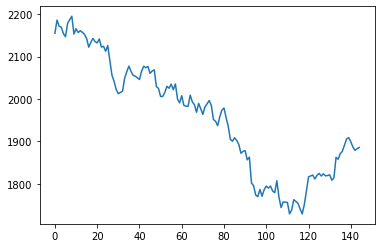

In [13]:
ax1 = df['close'].plot(style = ['-'])

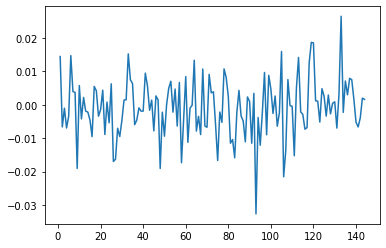

In [14]:
ax2 = df['Return'].plot(style = ['-'])

<AxesSubplot:>

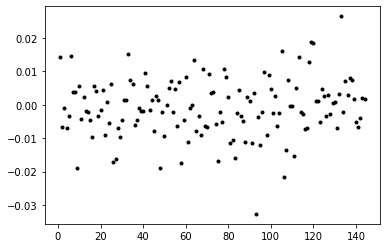

In [15]:
df['Return'].plot(style = ['k.'])

<AxesSubplot:>

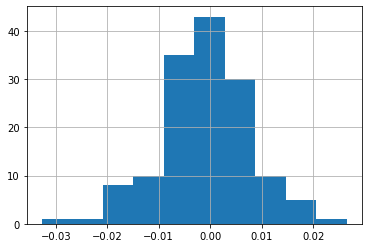

In [16]:
df['Return'].hist()